# Functions

In [77]:
%run "../Notebooks/intialization.ipynb"
%run "../Notebooks/Stitching_functions.ipynb"
%run "../Notebooks/Visualization_functions.ipynb"
%run "../Notebooks/Downsampling_and_outliers_functions.ipynb"
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Sort sequences appropriately

Given the initial 10 teeth: 
- external images are sorted as 0 to 9
- internal images are sorted as 9 to 0
- upper images are sorted as 0 to 9

need to reverse the order of internal images and ply


In [78]:
num_teeth = 10
external_img = [cv2.imread(path) for path in all_paths_images[:num_teeth]]
internal_img = [cv2.imread(path) for path in all_paths_images[num_teeth:2*num_teeth]]
upper_img = [cv2.imread(path) for path in all_paths_images[-num_teeth:]]

In [79]:
# reverse in place the internal ones
internal_img.reverse()

# plot tooth

In [80]:
t = 1

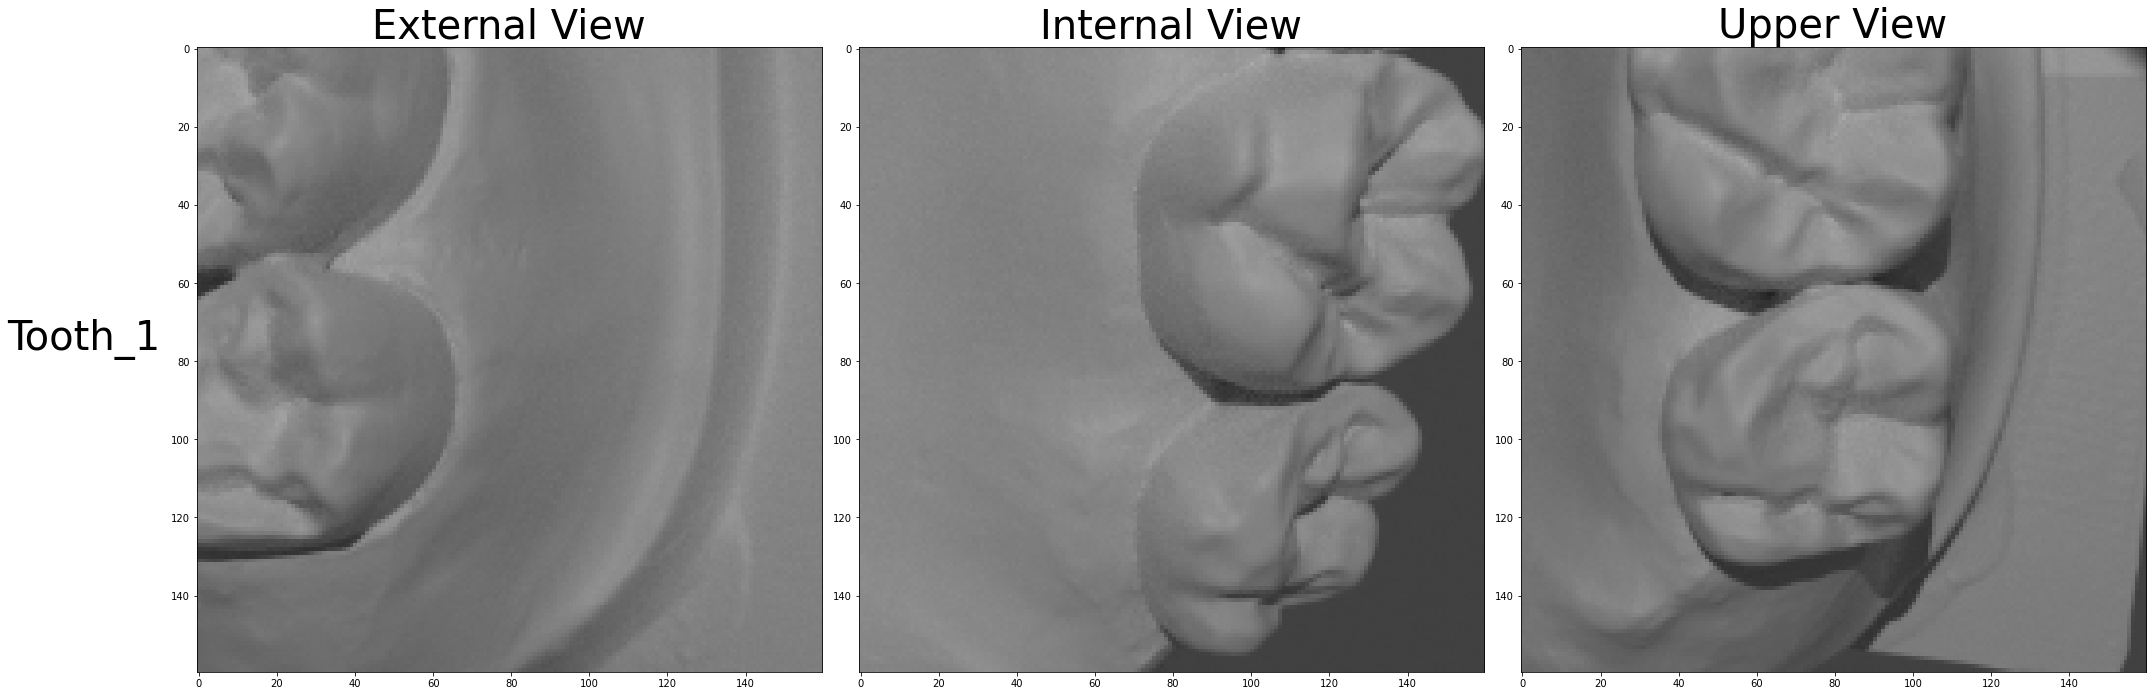

In [81]:
one_tooth_images= [external_img[t],internal_img[t],upper_img[t]]
display_one_tooth(one_tooth_images,toothnum = t, rows = 1, cols=len(one_tooth_images))


# plot multiple teeth

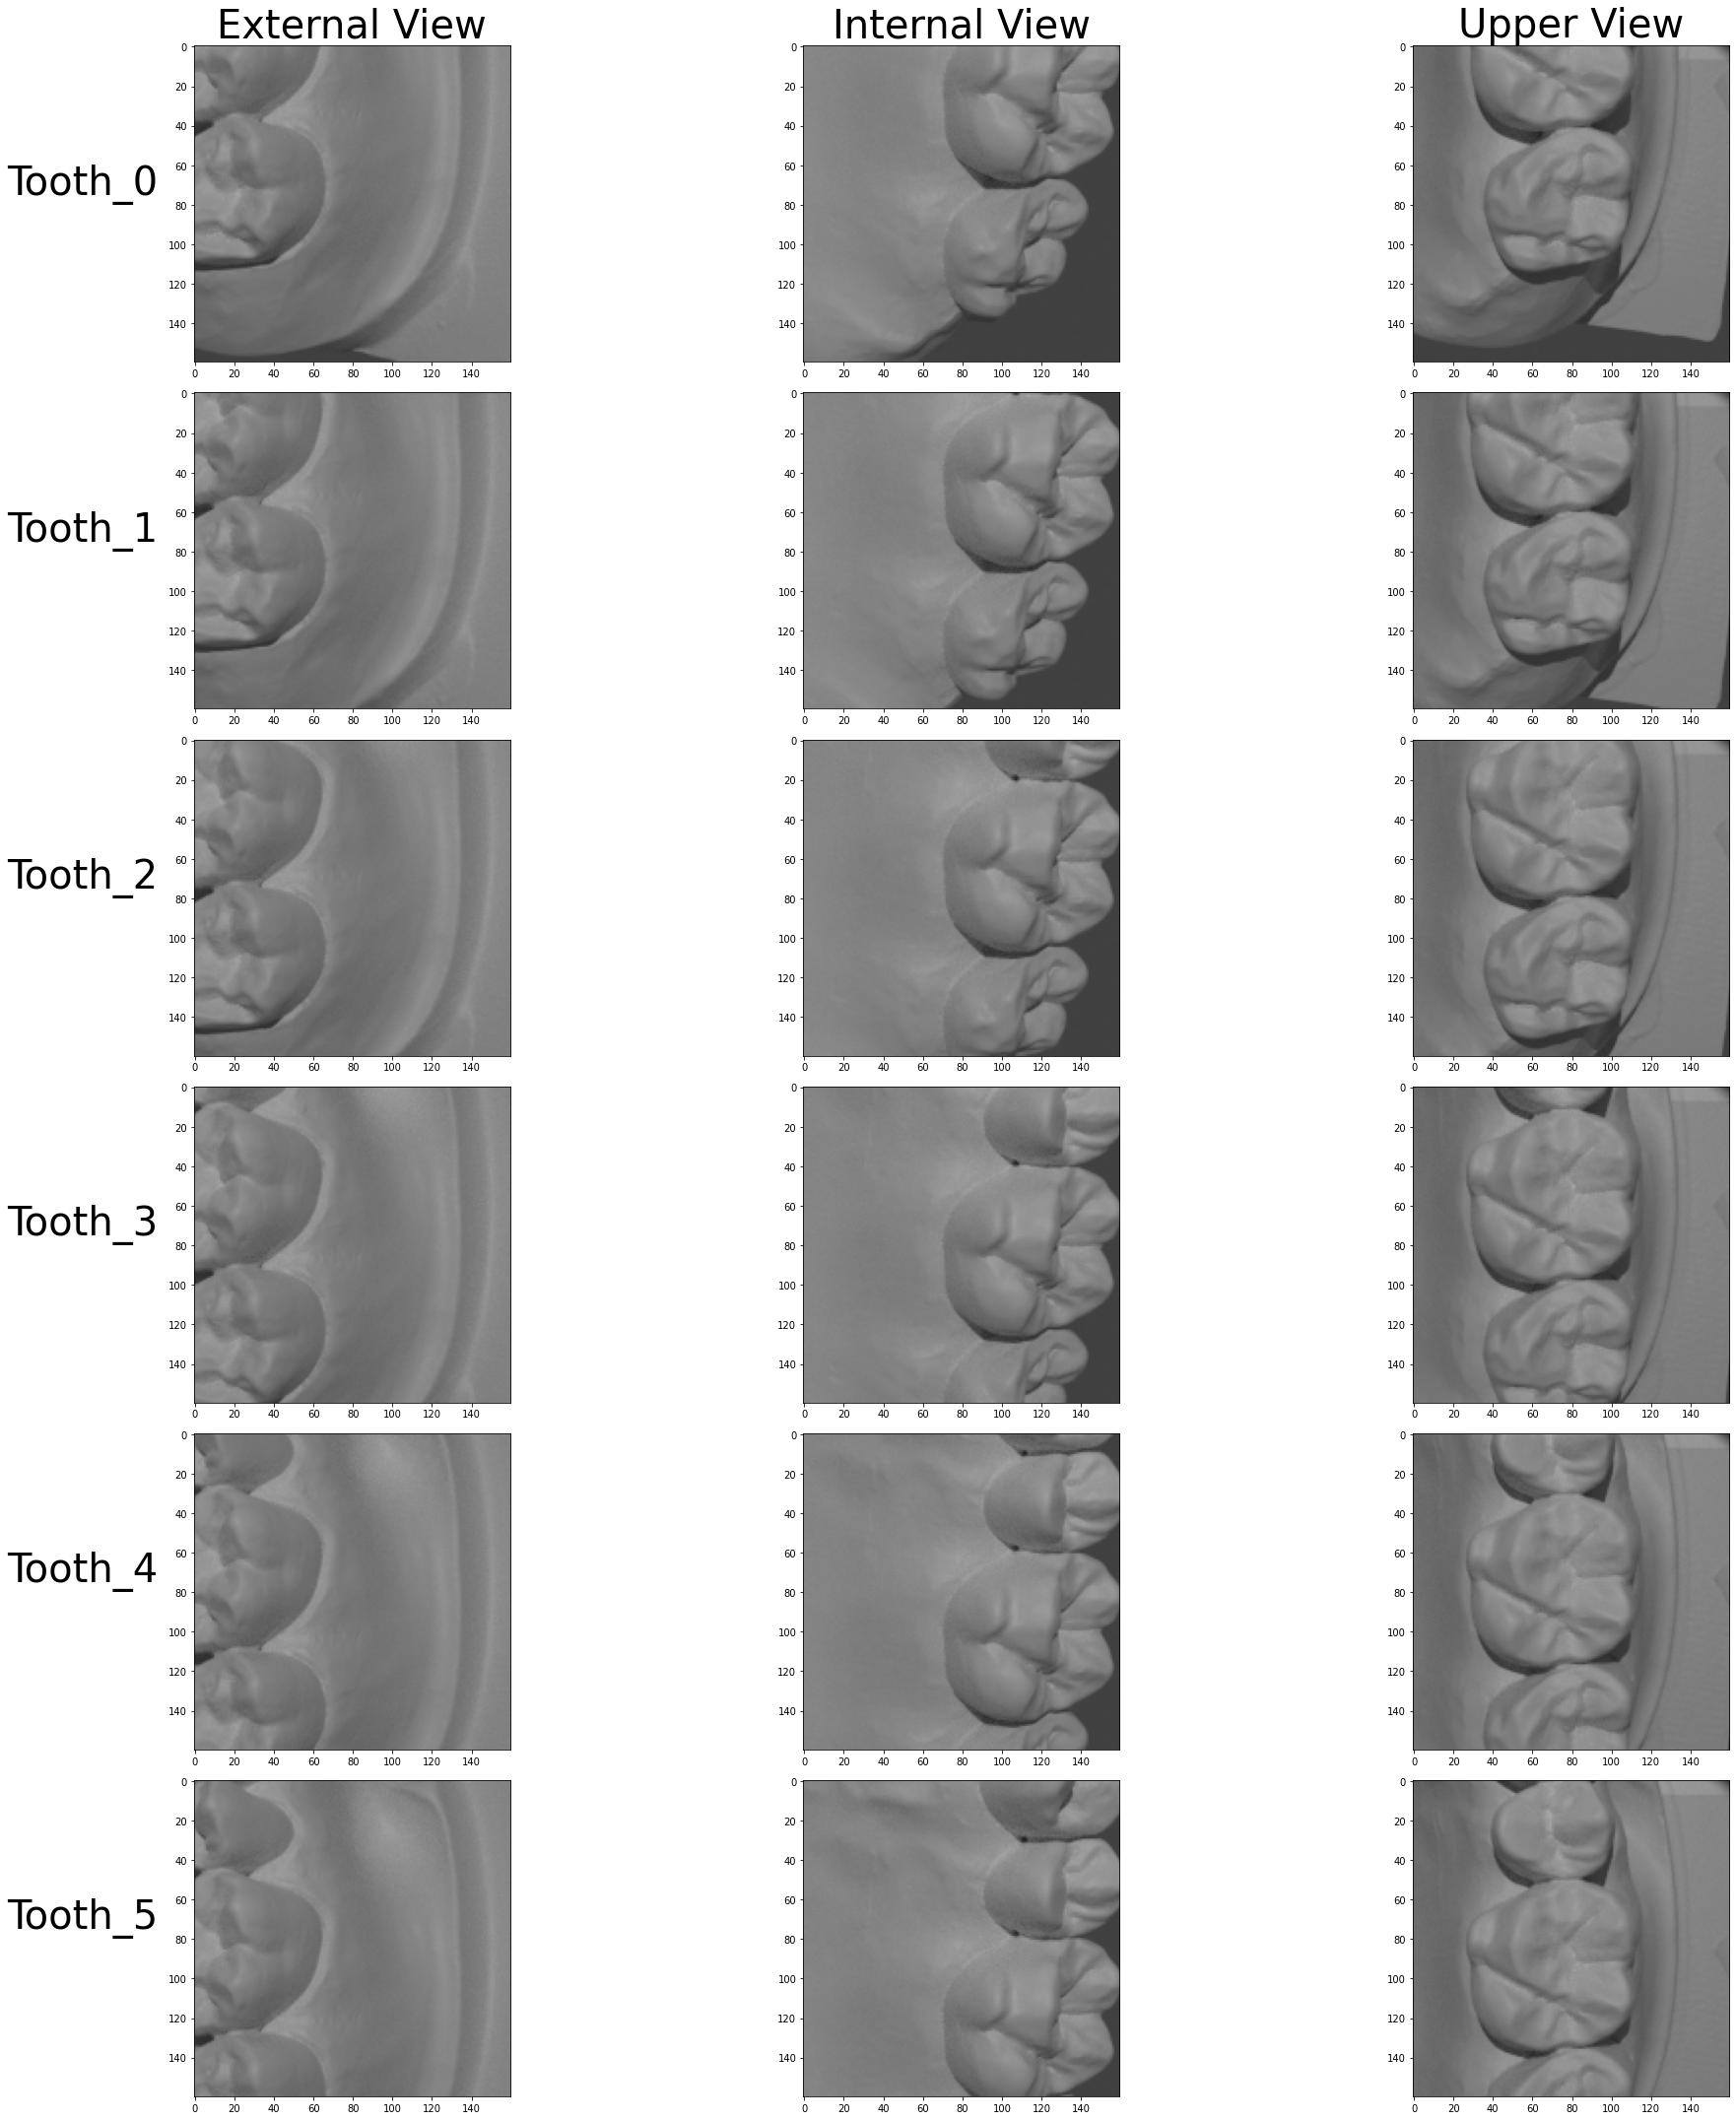

In [82]:
T = (0,6) # visualizing teeth from 5 to 9 
many_images= [external_img[T[0]:T[1]], internal_img[T[0]:T[1]], upper_img[T[0]:T[1]]] 
display_multiple_teeth(many_images,T, rows = len(external_img[T[0]:T[1]]), cols=len(many_images))

# Load Point Clouds

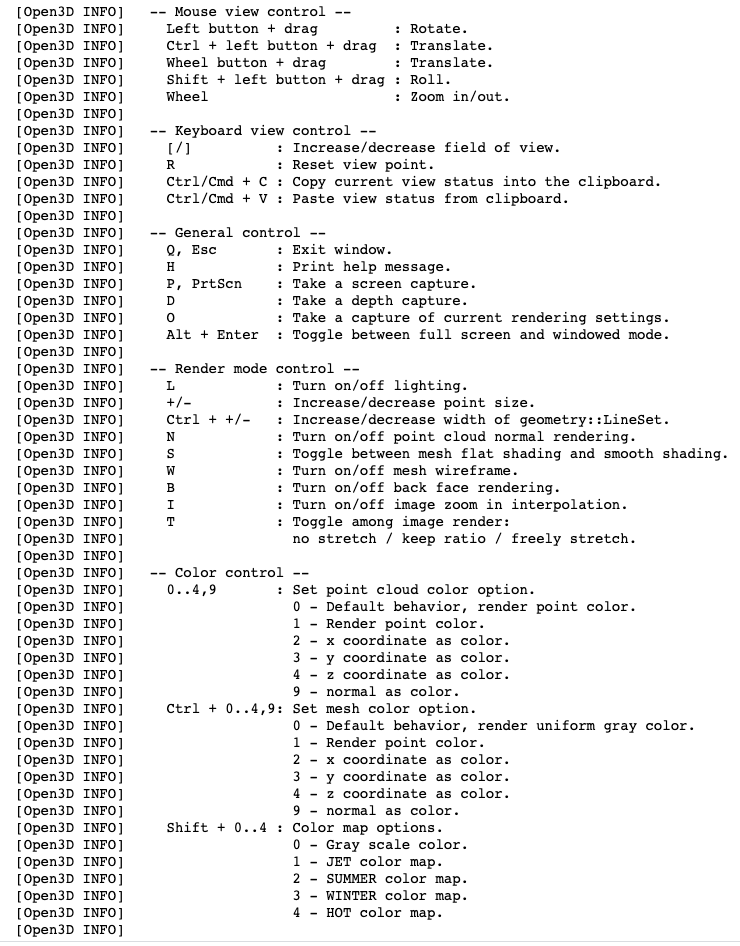

In [83]:
# instructions
Im(filename='instructions.png',
  width = 500) 

### load one point cloud 

In [84]:
#load one point cloud 
# http://www.open3d.org/docs/release/python_api/open3d.geometry.PointCloud.html
test_num = 20
path = ply_folder+"/"+all_ply[test_num]
pcd = o3d.io.read_point_cloud(path)
print(pcd)
## how to access the points
print(np.asarray(pcd.points))

PointCloud with 22217 points.
[[-10.407411 -10.407411  53.099034]
 [-10.271841 -10.401864  53.070736]
 [-10.138216 -10.39817   53.051888]
 ...
 [  3.092426  10.621811  54.878902]
 [  3.226965  10.622094  54.880359]
 [  3.361356  10.621886  54.879286]]


### visualize point cloud- default function

In [85]:
#simple point cloud visualization 
### visualize point cloud- opens a pop up window
mytitle = "generic_visualization"
o3d.visualization.draw_geometries([pcd],
                                 width=1000, height=800,
                                 window_name='%s'%(mytitle))

In [86]:
custom_draw_geometry(pcd, 
                         mytitle =  "generic_visualization", mytuples = None,
                         params =None, 
                         configuration_file = None, 
                         take_screen_shot = False,
                         rotate = True)

[Open3D WARNING] GLFW Error: The GLFW library is not initialized


In [87]:
## stuff with timestamp
#!ls -lt

In [88]:
## show files in directory recenlty modified
!find . -mtime 0

.
./10012021-22h44m41s-stitch_allpc_downsampled_upper_external.pcd
./RenderOption_2021-01-11-12-22-53.json
./Screenshot 2021-01-08 at 11.30.28.png
./cropped.png
./ScreenCamera_2021-01-10-15-00-31.json
./complete_cluster_3.pcd
./RenderOption_2021-01-11-12-27-31.json
./ScreenCapture_2021-01-12-01-11-28.png
./DepthCamera_2021-01-10-22-37-11.json
./ScreenCamera_2021-01-10-16-10-04.json
./ScreenCapture_2021-01-11-14-42-22.png
./ScreenCamera_2021-01-08-10-35-04.json
./complete_cluster_2.pcd
./stitch2plyfolder.zip
./test_cloud.png
./.DS_Store
./ScreenCamera_2021-01-12-01-15-26.json
./ScreenCamera_2021-01-12-01-11-28.json
./ScreenCapture_2021-01-11-12-37-47.png
./ScreenCamera_2021-01-11-12-03-12.json
./RenderOption_2021-01-10-13-54-21.json
./ScreenCamera_2021-01-11-14-51-54.json
./11012021-13h01m00sstitched_upper_pc.pcd
./instructions.png
./11012021-13h13m15s-stitch_11012021-13h13m15s-upper_external.pcd
./ScreenCamera_2021-01-11-18-27-54.json
./DepthCapture_2021-01-10-22-37-11.png
./ScreenCame

In [89]:
# shows very last file
!ls -rt | tail -1

ScreenCamera_2021-01-12-01-25-51.json


In [90]:
# with glob 
import glob
newest = max(glob.iglob('./*'), key=os.path.getctime)
newest

'./ScreenCamera_2021-01-12-01-25-51.json'

Load configuration file:

In [91]:
configuration_file = newest # the configuration file gives the details of the shape eg light, thickness etc NOT the position (see below)
custom_draw_geometry_load_option(pcd, configuration_file)

[Open3D WARNING] ViewTrajectory read JSON failed: unsupported json format.


### visualize point could -custom made


> Save configuration file as .json with O

> Save picture(png) and camera(json) with pov with P

## parameters initialization 

In [92]:
myparams = "./ScreenCamera_2021-01-11-12-06-34.json"  # parameter for camera point view, json file via pressing P
myconfiguration_file = "RenderOption_2021-01-11-12-22-53.json" # configuration file for properties, json file via pressing o


## good custom draw geometry (one point cloud)

In [93]:
# https://github.com/intel-isl/Open3D/issues/1483
custom_draw_geometry(pcd, # point cloud
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = False) # with rotate true the config arent read

loading parameters: 
  ./ScreenCamera_2021-01-11-12-06-34.json
loading configuration file: 
  RenderOption_2021-01-11-12-22-53.json


### downsampling

The higher the voxel size the less points we have. 

In [94]:
down_pcd = pcd.voxel_down_sample(voxel_size=0.3)
print ("number of points with voxel down sample" ,len(np.array(down_pcd.points)))
#o3d.visualization.draw_geometries([down_pcd.paint_uniform_color([0.8, 0.8, 0.8])])

number of points with voxel down sample 6371


### outlier removal

In [95]:
### Statistical oulier removal
# effect is to highlight the contours
# increasing the number of neightbors more outliers in the countours
# de creasing the number std_ratio gives wider contours
mytitle ="Statistical oulier removal"

my_nb_neighbors=100
my_std_ratio=0.01

parameters = (my_nb_neighbors,my_std_ratio)
parameters_labels = ("my_nb_neighbors","my_std_ratio")
mytuples = list(zip(parameters_labels,parameters))

cloud, ind = down_pcd.remove_statistical_outlier(nb_neighbors=my_nb_neighbors,
                                                std_ratio=my_std_ratio)
display_inlier_outlier(down_pcd, ind, mytitle, mytuples)

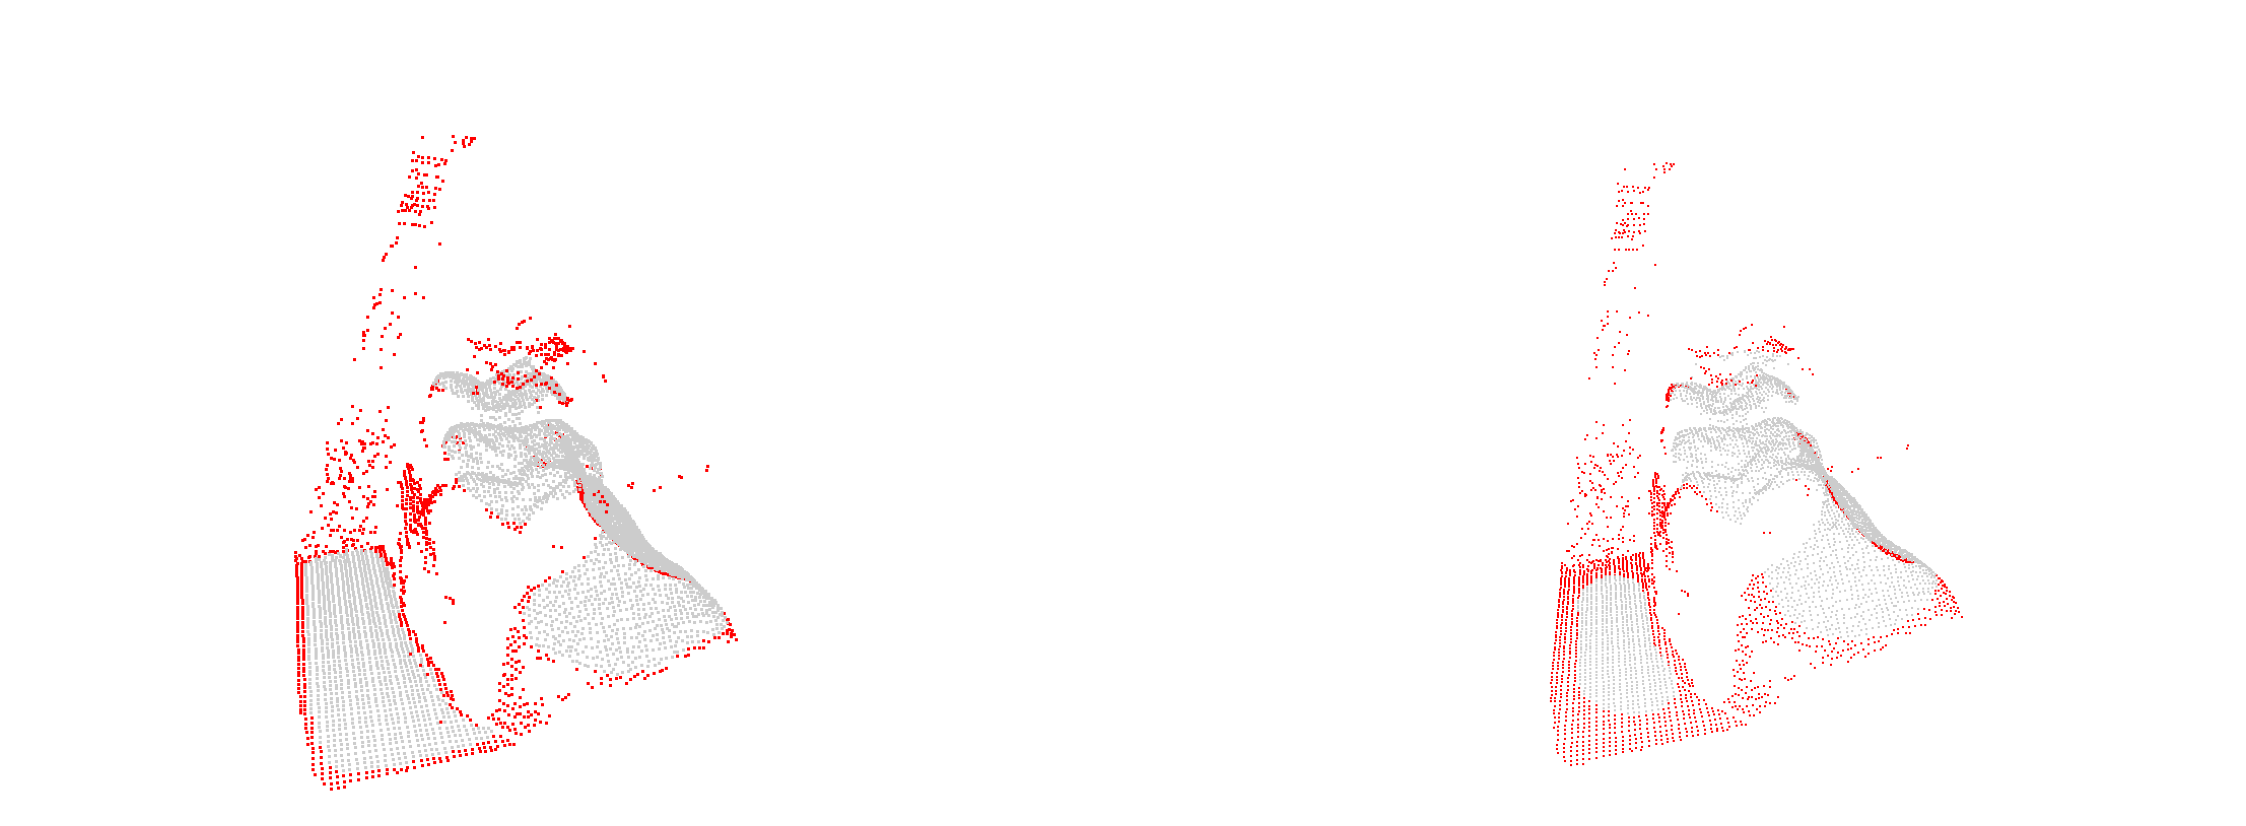

In [96]:
img_temp = list()
img_temp.append(cv2.imread('ScreenCapture_2021-01-11-12-28-43.png'))
img_temp.append(cv2.imread('ScreenCapture_2021-01-11-12-29-22.png'))


rows = 1
cols = 2
fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(40, 40))
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(plt_format(img_temp[j]))
        axes[i][j].axis('off')

## custom visualization of outliers 

In [97]:
### Radius oulier removal
print("Radius oulier removal")
cl, ind = down_pcd.remove_radius_outlier(nb_points=10, radius=0.7)
display_inlier_outlier(down_pcd, ind)

Radius oulier removal


In [98]:
#custom_draw_geometry(cl)

In [99]:
#custom_draw_geometry_with_custom_fov(down_pcd, 30.0)

In [100]:
#custom_draw_geometry_with_rotation(cl)

In [101]:
custom_draw_geometry_outliers(down_pcd, ind, 
                              mytitle = "Radius_oulier_removal", mytuples = mytuples,
                              params = myparams,  # parameter for camera point view, json file via pressing P
                              configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                              fov_step  = 15,
                              rotate = False)

loading parameters: 
  ./ScreenCamera_2021-01-11-12-06-34.json
Field of view (before changing) 60.00
Field of view (after changing) 75.00
loading configuration file: 
  RenderOption_2021-01-11-12-22-53.json


In [102]:
### hidden points removal
diameter = np.linalg.norm(
                          np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
print (diameter)
print("Define parameters used for hidden_point_removal")
a = 0
b = 0
camera = [a, b, diameter]
radius = diameter * 200

print("Get all points that are visible from given view point")
pcd_clean, pt_map = pcd.hidden_point_removal(camera, radius)

#print("Visualize result")
custom_draw_geometry_outliers(pcd, pt_map, 
                              mytitle = "Radius_oulier_removal", mytuples = mytuples,
                              params = myparams,  # parameter for camera point view, json file via pressing P
                              configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                              #fov_step  = 15,
                              rotate = True)

39.362430474859934
Define parameters used for hidden_point_removal
Get all points that are visible from given view point
loading parameters: 
  ./ScreenCamera_2021-01-11-12-06-34.json
loading configuration file: 
  RenderOption_2021-01-11-12-22-53.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


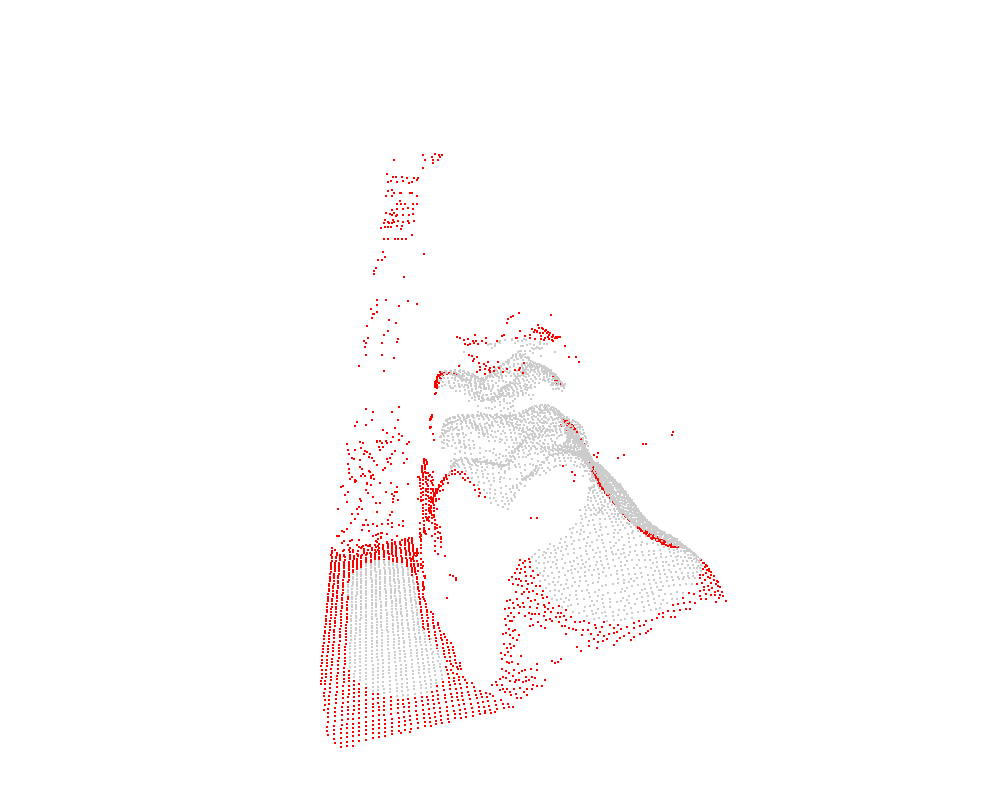

In [103]:
Im(filename='ScreenCapture_2021-01-11-12-29-22.png',
  width = 500, height = 400) 

### sets of Point Clouds

In [104]:
num_teeth = 10

external_ply = [o3d.io.read_point_cloud(path) for path in all_paths_ply[:num_teeth]]
internal_ply = [o3d.io.read_point_cloud(path) for path in all_paths_ply[num_teeth:2*num_teeth]]
upper_ply = [o3d.io.read_point_cloud(path) for path in all_paths_ply[-num_teeth:]]

In [105]:
# reverse in place the internal ones
internal_ply.reverse()

In [106]:
# create sets of three could per tooth
dictionary_pointclouds= { t: (external_ply[t],internal_ply[t],upper_ply[t]) for t in list(range(num_teeth))}
dictionary_pointclouds

{0: (PointCloud with 24775 points.,
  PointCloud with 20619 points.,
  PointCloud with 22217 points.),
 1: (PointCloud with 25350 points.,
  PointCloud with 22204 points.,
  PointCloud with 24173 points.),
 2: (PointCloud with 25371 points.,
  PointCloud with 23258 points.,
  PointCloud with 24667 points.),
 3: (PointCloud with 25508 points.,
  PointCloud with 23923 points.,
  PointCloud with 25044 points.),
 4: (PointCloud with 25547 points.,
  PointCloud with 24289 points.,
  PointCloud with 25115 points.),
 5: (PointCloud with 25545 points.,
  PointCloud with 24714 points.,
  PointCloud with 25123 points.),
 6: (PointCloud with 25549 points.,
  PointCloud with 24995 points.,
  PointCloud with 24966 points.),
 7: (PointCloud with 25591 points.,
  PointCloud with 24805 points.,
  PointCloud with 25156 points.),
 8: (PointCloud with 25590 points.,
  PointCloud with 24896 points.,
  PointCloud with 25036 points.),
 9: (PointCloud with 25590 points.,
  PointCloud with 24983 points.,
  Po

In [ ]:
## test
#o3d.io.read_point_cloud(all_paths_ply[0])